In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from Planner import PolynomialPlanner
import matplotlib.pyplot as plt

In [23]:
end_time = 1
end_value = 1
steps = 60

planner = PolynomialPlanner([0, 0, 0], [end_value, 0, 0], 0, end_time, 2)
ts = np.linspace(0, end_time, steps)
traj = planner.eval_vec(ts)
us = traj[:, 2]


def rhs(x, u):
    return np.array([x[1], u])

In [24]:
xs = np.zeros((steps, 2))

for i, t in enumerate(ts[:-1]):
    sol = solve_ivp(lambda t, x: rhs(x, us[i]), (t, ts[i + 1]), xs[i], method="RK45", rtol=1e-6, atol=1e-9)
    xs[i+1] = sol.y[:, -1]
    
output_trajectory = traj[:, 0]
output_simulated = xs[:, 0]
output_difference = output_simulated - output_trajectory

-0.0014360387546431541


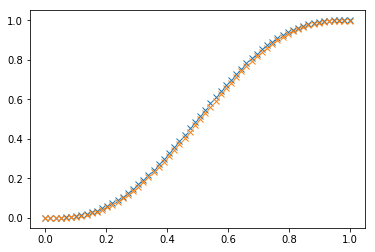

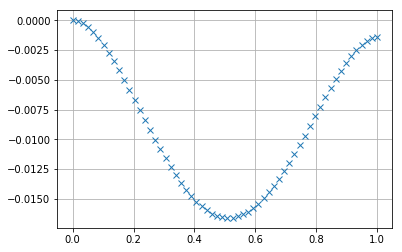

In [26]:
plt.figure()
plt.plot(ts, traj[:, 0], 'x')
plt.plot(ts, xs[:, 0], 'x')
plt.figure()
plt.plot(ts, xs[:, 0] - traj[:, 0], 'x')
plt.grid()

print(output_difference[-1])